# Oasis Infobyte 

## Task1 - Iris Flower Classification

## Name - Rahul Sunil Sardesai
### Nov P1 Batch


In [40]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [5]:
df=pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#information about the dataset
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#describing about the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

## Dropping ID column cause it's not imp

In [9]:
df.drop('Id',axis=1,inplace=True)

In [10]:
#count the value
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
#finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
pip install missingno

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


<AxesSubplot:>

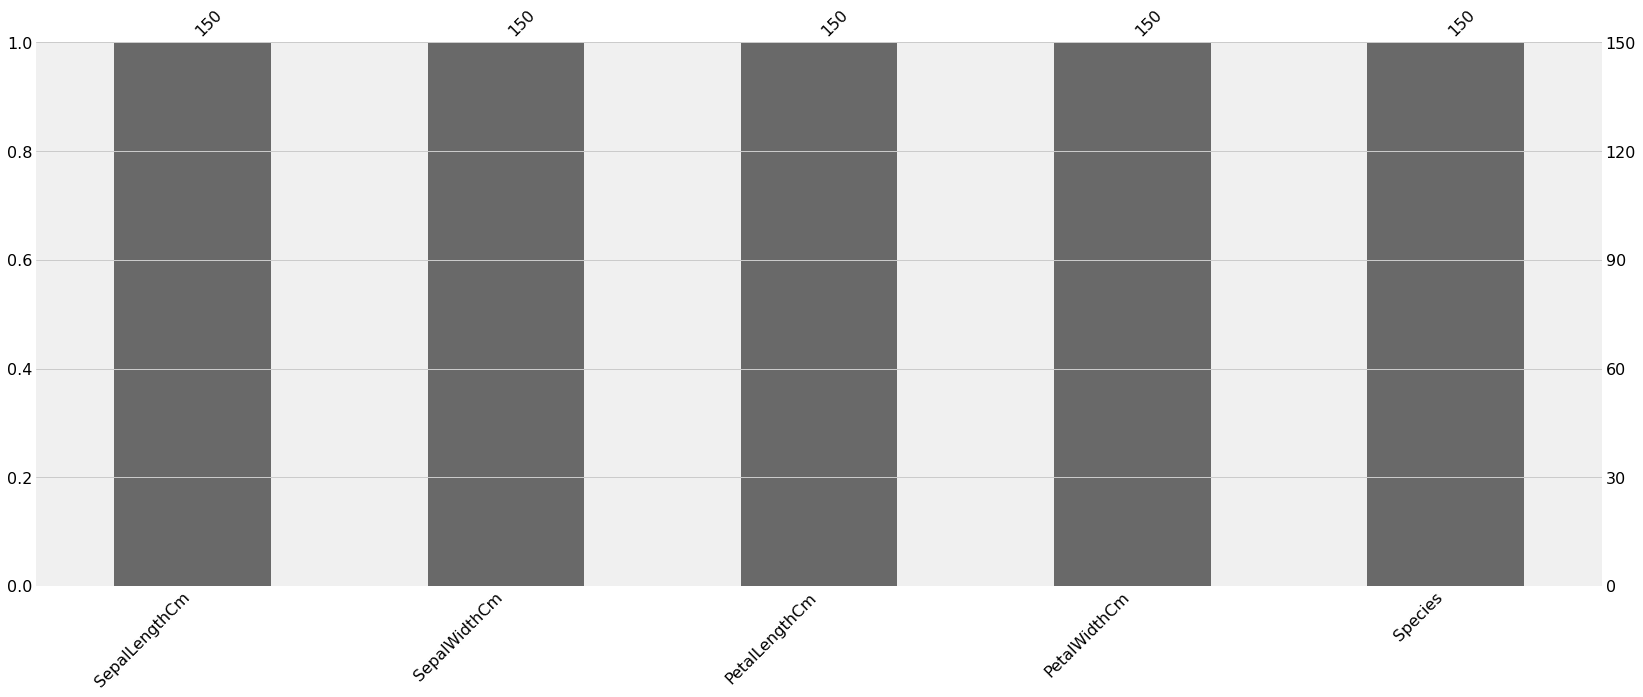

In [14]:
import missingno as msno
msno.bar(df)

In [15]:
df.drop_duplicates(inplace=True)

# EDA

## Relationship between species and sepal lengthj

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

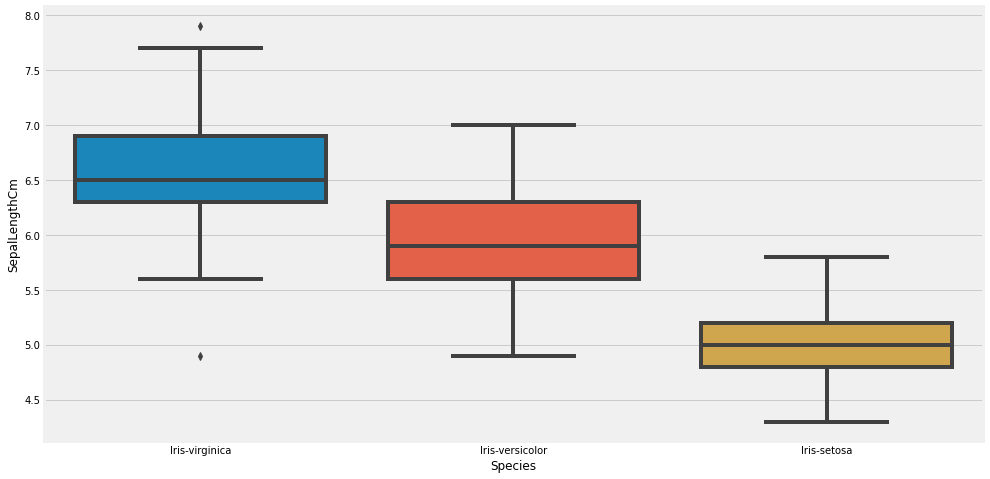

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))


## Relationship between Width and sepal length

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

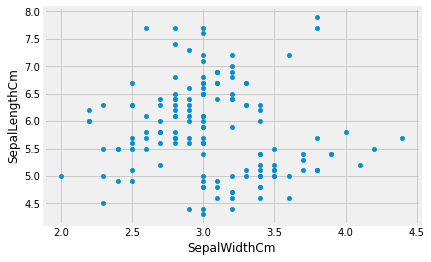

In [19]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

## Relationship between sepal Width and sepal length

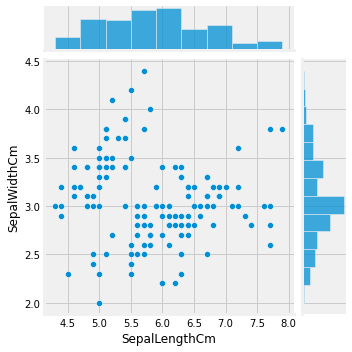

In [20]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

## Pairplot

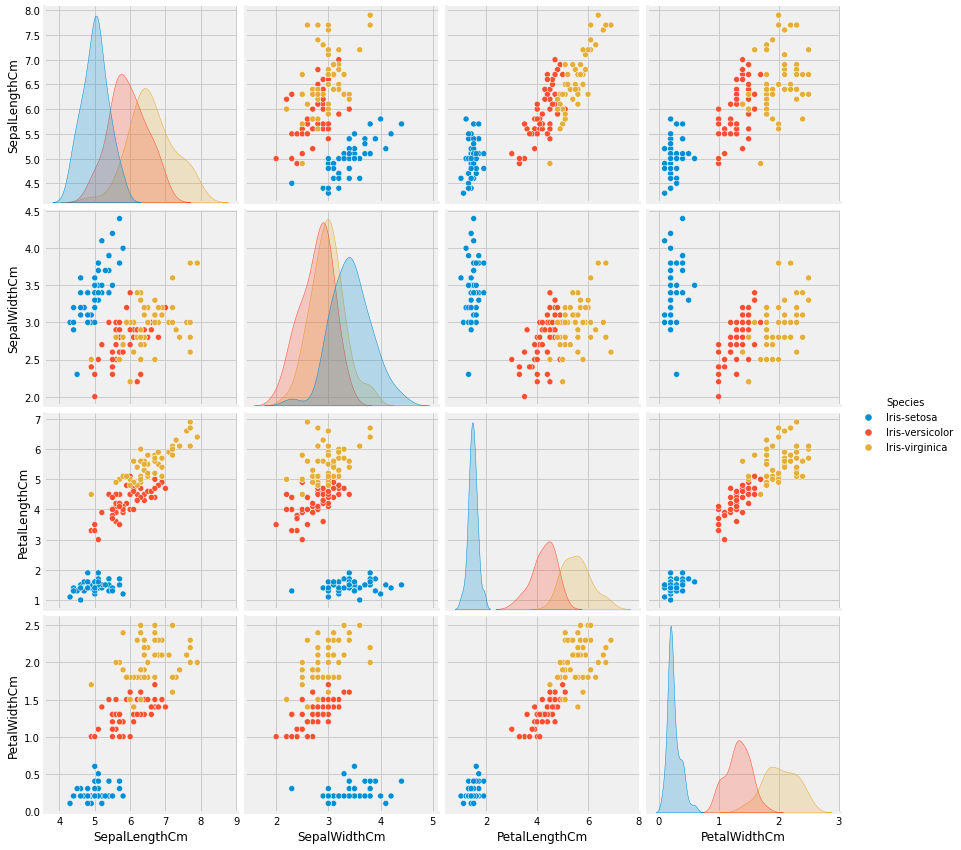

In [21]:
sns.pairplot(df, hue="Species", size=3)

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

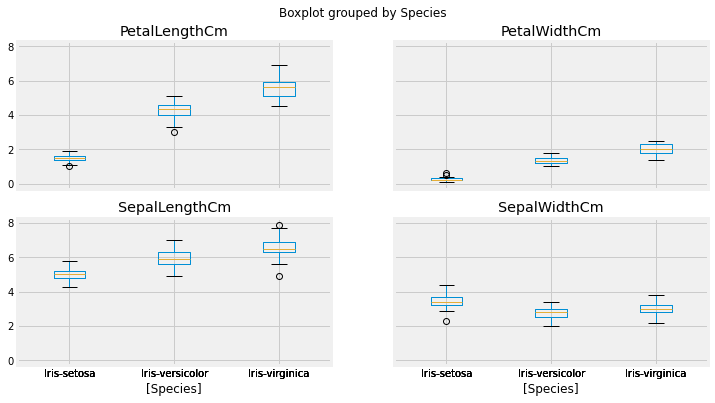

In [22]:
df.boxplot(by="Species", figsize=(12, 6))

## Andrews's Curve

<AxesSubplot:>

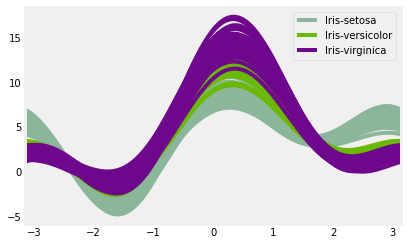

In [23]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

## Categorical Plot

<Figure size 1080x1080 with 0 Axes>

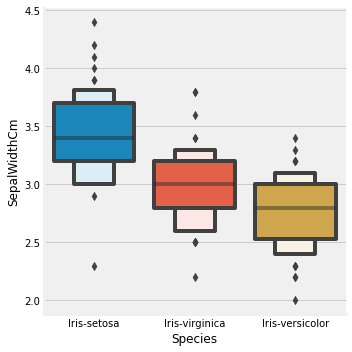

In [24]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

## Violin Plot

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

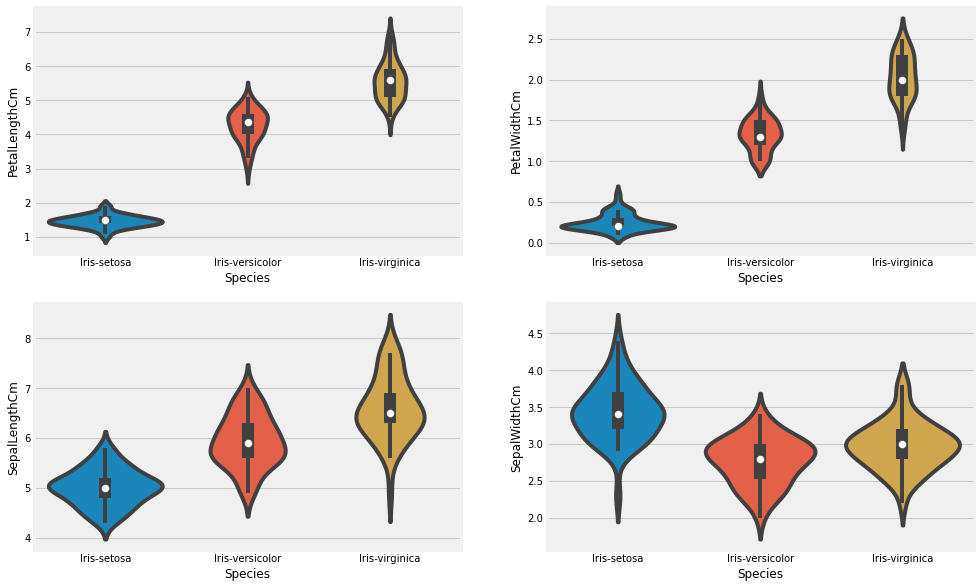

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

# Classification 

In [26]:
X=df.drop('Species',axis=1)
y=df['Species']

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [28]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [30]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 2s 195ms/step - loss: 1.5081 - accuracy: 0.3235 - val_loss: 1.3623 - val_accuracy: 0.1556
Epoch 2/45
4/4 [==============================] - 0s 34ms/step - loss: 1.3082 - accuracy: 0.0588 - val_loss: 1.2338 - val_accuracy: 0.3111
Epoch 3/45
4/4 [==============================] - 0s 30ms/step - loss: 1.1869 - accuracy: 0.3235 - val_loss: 1.1621 - val_accuracy: 0.2444
Epoch 4/45
4/4 [==============================] - 0s 36ms/step - loss: 1.1309 - accuracy: 0.2745 - val_loss: 1.1179 - val_accuracy: 0.2000
Epoch 5/45
4/4 [==============================] - 0s 36ms/step - loss: 1.0853 - accuracy: 0.3529 - val_loss: 1.0772 - val_accuracy: 0.3333
Epoch 6/45
4/4 [==============================] - 0s 41ms/step - loss: 1.0540 - accuracy: 0.3333 - val_loss: 1.0407 - val_accuracy: 0.3333
Epoch 7/45
4/4 [==============================] - 0s 35ms/step - loss: 1.0170 - accuracy: 0.3333 - val_loss: 0.9991 - val_accuracy: 0.3333
Epoch 8/45
4/4 [==========

In [33]:

model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.4241 - accuracy: 0.9333


[0.42412322759628296, 0.9333333373069763]

In [34]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 231ms/step
[[0.01133798 0.3489672  0.63969475]
 [0.00976998 0.34689325 0.6433367 ]
 [0.09226324 0.54819256 0.35954425]
 [0.05977549 0.5109281  0.4292964 ]
 [0.90518594 0.07182486 0.02298915]
 [0.05616374 0.5420177  0.40181857]
 [0.00987591 0.2826456  0.70747846]
 [0.01114441 0.3031977  0.68565786]
 [0.9078003  0.07121126 0.02098836]
 [0.02406097 0.4289835  0.54695547]]


In [35]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [36]:
history.history['accuracy']

[0.3235294222831726,
 0.05882352963089943,
 0.3235294222831726,
 0.27450981736183167,
 0.3529411852359772,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.4803921580314636,
 0.686274528503418,
 0.7647058963775635,
 0.6764705777168274,
 0.7745097875595093,
 0.8921568393707275,
 0.8627451062202454,
 0.9215686321258545,
 0.9411764740943909,
 0.9313725233078003,
 0.9509803652763367,
 0.8333333134651184,
 0.7843137383460999,
 0.7352941036224365,
 0.7058823704719543,
 0.843137264251709,
 0.9313725233078003,
 0.9411764740943909,
 0.9313725233078003,
 0.8627451062202454,
 0.7941176295280457,
 0.813725471496582,
 0.8921568393707275,
 0.9313725233078003,
 0.9313725233078003,
 0.9313725233078003,
 0.9411764740943909,
 0.9509803652763367,
 0.9509803652763367,
 0.9509803652763367,
 0.9607843160629272,
 0.9607843160629272,
 0.9607843160629272,
 0.9509803652763367,
 0.9607843160629272,
 0.9607843160629272,
 0.970588207244873]

In [37]:
history.history['val_accuracy']

[0.15555556118488312,
 0.31111112236976624,
 0.24444444477558136,
 0.20000000298023224,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.6666666865348816,
 0.8444444537162781,
 0.6666666865348816,
 0.6666666865348816,
 0.8888888955116272,
 0.7777777910232544,
 0.8444444537162781,
 0.8666666746139526,
 0.9111111164093018,
 0.9111111164093018,
 0.8666666746139526,
 0.7555555701255798,
 0.7333333492279053,
 0.6666666865348816,
 0.7555555701255798,
 0.8666666746139526,
 0.9555555582046509,
 0.9111111164093018,
 0.8222222328186035,
 0.7777777910232544,
 0.7555555701255798,
 0.8222222328186035,
 0.8444444537162781,
 0.8666666746139526,
 0.8666666746139526,
 0.8888888955116272,
 0.8888888955116272,
 0.9333333373069763,
 0.9777777791023254,
 0.9333333373069763,
 0.9555555582046509,
 0.9555555582046509,
 0.9777777791023254,
 0.9111111164093018,
 0.9777777791023254,
 0.9333333373069763,
 0.9333333373069763]

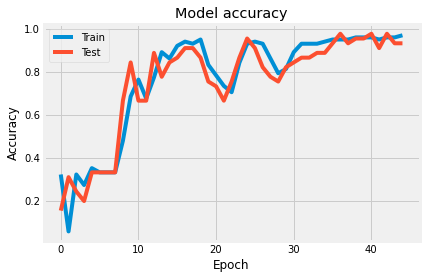

In [38]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

# Conclusion ->

### In conclusion, the successful classification of iris flowers demonstrates the efficacy of machine learning algorithms in distinguishing subtle patterns within datasets. This model not only showcases the power of feature analysis but also underscores the importance of employing robust methodologies for accurate species identification, contributing valuable insights to both botanical research and the broader field of machine learning applications.